In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [41]:
data=pd.read_csv('data.csv')
# data.head()
# data.info()
# data.describe()

n=data.isnull().sum()
print(n)





Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [3]:
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())
data['Weather']=data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level']=data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Time_of_Day']=data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])

# n=data.isnull().sum()
# print(n)

In [42]:
# data.to_csv("clean_data.csv")
df=pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


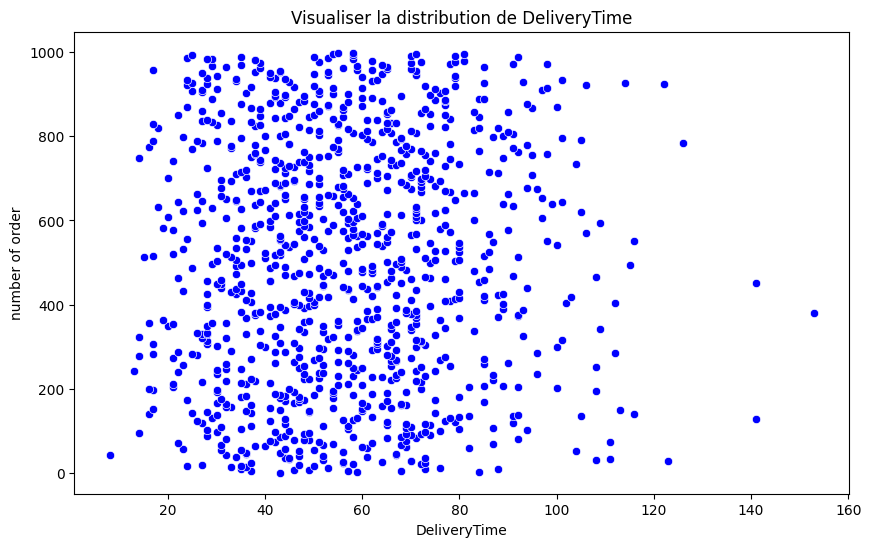

In [13]:
#Visualiser la distribution de DeliveryTime
data=pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_Time_min',y=df.index,data=df, color="blue")
plt.title('Visualiser la distribution de DeliveryTime')
plt.xlabel('DeliveryTime')
plt.ylabel('number of order')
plt.show()


In [ ]:
 
sns.barplot(
    x=df['Delivery_Time_min'].value_counts().index,
    y=df['Delivery_Time_min'].value_counts().values,
    color="blue"
)
plt.title('Distribution du DeliveryTime')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Nombre de livraisons')
plt.show()

In [ ]:
cols=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Nombre de commandes par {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de commandes")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
#boxplot
cols=["Traffic_Level","Vehicle_Type","Weather"]
for col in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')
    plt.title(f"DeliveryTime selon {col}")
    plt.xlabel(col)
    plt.ylabel("DeliveryTime")
    plt.show()



In [ ]:
#transformation des columns categoriels
cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']

encoder=OneHotEncoder(sparse_output=False)

encoded=encoder.fit_transform(df[cols])
print(encoded)
encoded_df=pd.DataFrame(
   encoded,
    columns=encoder.get_feature_names_out(cols),
    index=df.index
)

# df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)


# print(df.columns)
# print(encoded)

# df.drop(cdf = df.drop(
#     columns=[col for col in df.columns if col.startswith(('Weather_', 'Traffic_Level_', 'Time_of_Day_', 'Vehicle_Type_'))]
# )



Index(['Unnamed: 0', 'Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min', 'Weather_Clear',
       'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy',
       'Traffic_Level_High', 'Traffic_Level_Low', 'Traffic_Level_Medium',
       'Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
       'Vehicle_Type_Scooter'],
      dtype='object')


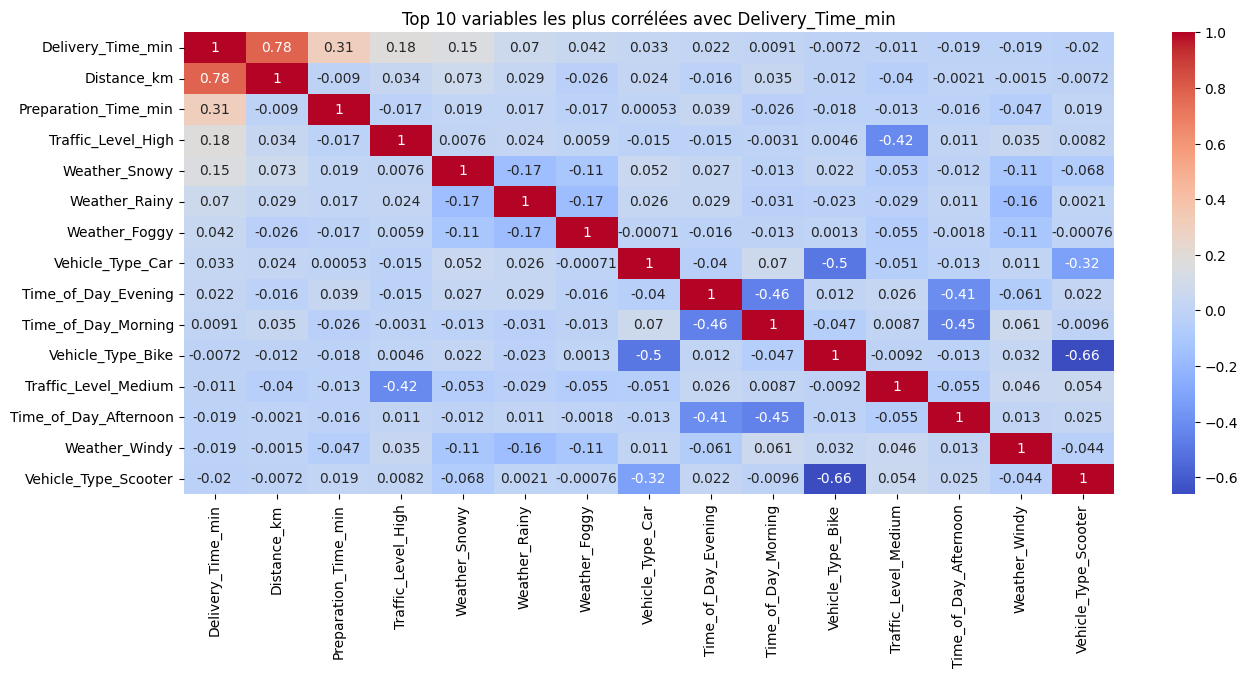

In [ ]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
plt.figure(figsize=(15,6))
top_corr=df.corr(numeric_only=True).nlargest(15,'Delivery_Time_min')['Delivery_Time_min'].index
sns.heatmap(df[top_corr].corr(),annot=True,cmap='coolwarm')
plt.title('Top 10 variables les plus corrélées avec Delivery_Time_min')
plt.show()



# plt.figure(figsize=(10,6))
# d=pd.DataFrame(df)
# sns.heatmap(d.corr(),annot=True,cmap='coolwarm')
# plt.title('Matrice Corrélation')
# plt.show()


In [ ]:
#Analyser les tendances (identifier les variables importantes)
# d'apres la matrice de correlation on constate que les columns qui varient sur delivery_time_min sont:distance_km ,
# preparation_time ,trafic_level_high

df.drop(columns=["Delivery_Time_min","Order_ID"])
X=data.drop(columns=["Delivery_Time_min","Order_ID"])
y=data["Delivery_Time_min"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    